In [1]:
import os
import pandas as pd
import numpy as np
import json
from google.colab import files
import io
from keras import layers
from keras import models
from keras import applications
from keras import optimizers
import keras

Using TensorFlow backend.


In [0]:
finalx=pd.read_csv('../content/data.csv')
finaly=np.loadtxt('../content/y', delimiter=',')
#valx=pd.read_csv('../content/valx.csv')
#valy=np.loadtxt('../content/valy', delimiter=',')

In [0]:
for i in range(31):
    finalx.iloc[:,i]=finalx.iloc[:,i]/finalx.iloc[:,i].max()

In [4]:
finalx=finalx.iloc[:100800,1:31]
finaly=finaly[:100800]
finalx=finalx.fillna(method='ffill')
x,y=finalx.shape
sam=finalx.values
out=pd.DataFrame(finaly)
out=out.values
out.shape
sam.shape


(100800, 30)

In [0]:
X=sam
X=X.reshape(int(len(out)/90),90,30)
Y=out
Y=Y.reshape(int(len(out)/90),90,1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [0]:
from keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
checkpoint_path='/content/weights21.{epoch:02d}-{val_accuracy:.2f}.hdf5'
callbacks_list=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=False,save_best_only=True,monitor='val_accuracy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)

In [0]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D,Dropout,BatchNormalization,TimeDistributed
from keras.models import Model
import tensorflow as tf
from keras import layers

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=180,return_sequences=True,input_shape=(90,30),recurrent_dropout=0.2))
#model.add(tf.keras.layers.Conv1D(filters=45,kernel_size=5,strides=1,activation='relu',padding='same'))
#model.add(tf.keras.layers.LSTM(units=45,return_sequences=True))
#model.add(tf.keras.layers.LSTM(units=45,return_sequences=True))
model.add(tf.keras.layers.LSTM(units=180,return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.LSTM(units=180,return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=180,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=45,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1, activation='sigmoid')))

In [0]:
adam=tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
X_train=tf.convert_to_tensor(X_train, np.float32)
X_test=tf.convert_to_tensor(X_test, np.float32)
y_train=tf.convert_to_tensor(y_train, np.float32)
y_test=tf.convert_to_tensor(y_test, np.float32)

In [11]:
history=model.fit(X_train,y_train,epochs=500,batch_size=30,validation_data=(X_test,y_test),callbacks=[callbacks_list])

Epoch 1/500
30/30 [==============================] - 23s 774ms/step - loss: 0.6733 - accuracy: 0.5941 - val_loss: 0.6840 - val_accuracy: 0.6504
Epoch 2/500
30/30 [==============================] - 22s 748ms/step - loss: 0.5723 - accuracy: 0.6621 - val_loss: 0.6698 - val_accuracy: 0.5949
Epoch 3/500
30/30 [==============================] - 22s 747ms/step - loss: 0.5408 - accuracy: 0.6805 - val_loss: 0.6591 - val_accuracy: 0.6429
Epoch 4/500
30/30 [==============================] - 22s 745ms/step - loss: 0.5064 - accuracy: 0.7095 - val_loss: 0.6492 - val_accuracy: 0.6365
Epoch 5/500
30/30 [==============================] - 22s 747ms/step - loss: 0.4957 - accuracy: 0.7234 - val_loss: 0.6335 - val_accuracy: 0.7160
Epoch 6/500
30/30 [==============================] - 23s 751ms/step - loss: 0.4718 - accuracy: 0.7466 - val_loss: 0.6223 - val_accuracy: 0.6768
Epoch 7/500
30/30 [==============================] - 23s 752ms/step - loss: 0.4580 - accuracy: 0.7508 - val_loss: 0.6028 - val_accuracy:

In [0]:
model.save('../content/wt.h5')


In [0]:
model.load_weights('/content/weights11.234-0.93.hdf5')

In [0]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)

In [0]:
l=y_pred.flatten()
q=[]
for i in l:
    if i>=0.5:
        q.append(1)
    else:
        q.append(0)

In [0]:
q=np.array(q)

In [28]:
#y_test=y_test.numpy()
#y_test=y_test.flatten()
tn, fp, fn, tp = confusion_matrix(y_test, q).ravel()
print(tn,tp,fn,fp)

9125 9637 623 775


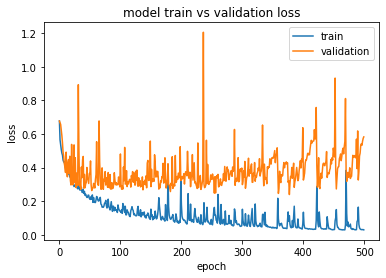

In [29]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

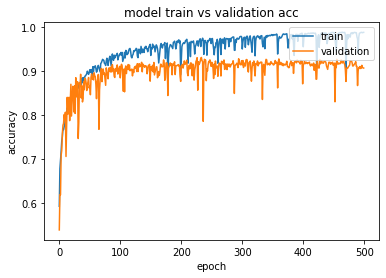

In [30]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()